## MDS step by step

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['class'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = np.array(df.iloc[:,:-1])
print(X.shape)

(150, 4)


#### Step 1 : Distance Matrix 만들기

In [4]:
# step 1
d_mat = np.zeros((len(X),len(X)))
print(d_mat,'\n')

for i in range(len(X)):
    for j in range(len(X)):
        d_mat[i,j] = (np.sum((X[i,:]-X[j,:])**2)) 
print(d_mat)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

[[ 0.    0.29  0.26 ... 19.89 21.63 17.14]
 [ 0.29  0.    0.09 ... 20.24 22.26 17.25]
 [ 0.26  0.09  0.   ... 21.73 23.51 18.48]
 ...
 [19.89 20.24 21.73 ...  0.    0.38  0.41]
 [21.63 22.26 23.51 ...  0.38  0.    0.59]
 [17.14 17.25 18.48 ...  0.41  0.59  0.  ]]


#### Step 2 : inner product matrix B 계산

In [5]:
# step 2
n = len(d_mat)
H = np.eye(n)-(1/n)*(np.ones((n,n)))
B = -H.dot(d_mat).dot(H)/2

In [6]:
print(B,'\n')
print(B.shape)

[[ 7.30732933  7.23466267  7.70766267 ... -4.71387067 -5.085204
  -3.832204  ]
 [ 7.23466267  7.451996    7.864996   ... -4.81653733 -5.32787067
  -3.81487067]
 [ 7.70766267  7.864996    8.367996   ... -5.10353733 -5.49487067
  -3.97187067]
 ...
 [-4.71387067 -4.81653733 -5.10353733 ...  3.15492933  3.463596
   2.456596  ]
 [-5.085204   -5.32787067 -5.49487067 ...  3.463596    4.15226267
   2.86526267]
 [-3.832204   -3.81487067 -3.97187067 ...  2.456596    2.86526267
   2.16826267]] 

(150, 150)


#### Step 3 : B의 eigenvector, eigenvalue를 통해 coordinate X(nxp) 구하기

In [7]:
# step 3
eigen_value, eigen_vector = np.linalg.eig(B)
inverseEigenVectors = np.linalg.inv(eigen_vector) 
diagonal = inverseEigenVectors.dot(B).dot(eigen_vector)


In [8]:
dimension = 2 # 축소할 차원 수 지정

B_1 = eigen_vector[:,0:dimension].dot(diagonal[0:dimension,0:dimension]).dot(eigen_vector[:,0:dimension].T)
diagonal[diagonal<1] = 0
coordinate_X = eigen_vector[:,0:dimension].dot(np.sqrt(diagonal[0:dimension,0:dimension]))
print(coordinate_X.shape)

(150, 2)


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


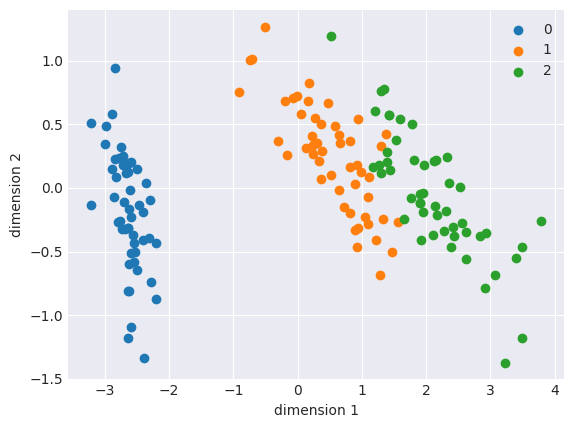

In [9]:
# 시각화
y = df['class'].values 

with plt.style.context("seaborn-darkgrid"):
    for l in np.unique(y):
        plt.scatter(coordinate_X[y==l,0], coordinate_X[y==l,1],label=l)
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2") 
    plt.legend()
    plt.show()


## MDS Library

###### reference - https://towardsdatascience.com/mds-multidimensional-scaling-smart-way-to-reduce-dimensionality-in-python-7c126984e60b

In [10]:
# Data manipulation
import pandas as pd # for data manipulation

# Visualization
import plotly.express as px # for data visualization

# Skleran
from sklearn.datasets import make_swiss_roll # for creating a swiss roll
from sklearn.manifold import MDS # for MDS dimensionality reduction

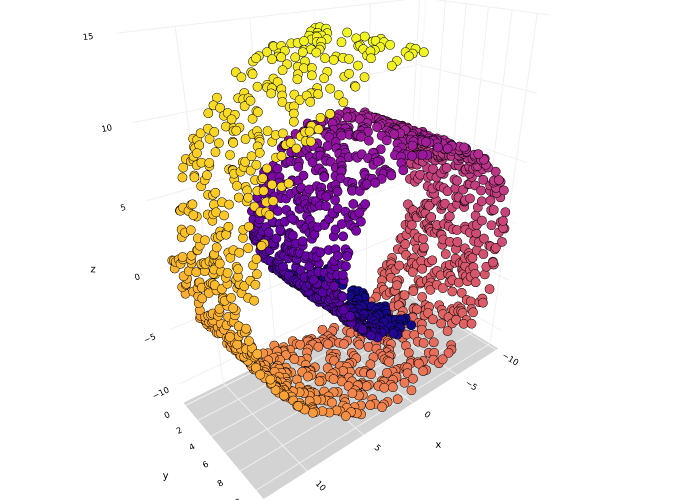

In [11]:
# Make a swiss roll
X, y = make_swiss_roll(n_samples=2000, noise=0.05)
# Make it thinner
X[:, 1] *= .5


# Create a 3D scatter plot
fig = px.scatter_3d(None, x=X[:,0], y=X[:,1], z=X[:,2], color=y,)

# Update chart looks
fig.update_layout(#title_text="Swiss Roll",
                  showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.1),
                                        eye=dict(x=1.25, y=1.5, z=1)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=3, 
                              line=dict(color='black', width=0.1)))

fig.update(layout_coloraxis_showscale=False)
fig.show('png')

In [12]:
### Step 1 - Configure MDS function, note we use default hyperparameter values for this example
model2d=MDS(n_components=2, 
          metric=True, 
          n_init=4, 
          max_iter=300, 
          verbose=0, 
          eps=0.001, 
          n_jobs=None, 
          random_state=42, 
          dissimilarity='euclidean')

### Step 2 - Fit the data and transform it, so we have 2 dimensions instead of 3
X_trans = model2d.fit_transform(X)
    
### Step 3 - Print a few stats
print('The new shape of X: ',X_trans.shape)
print('No. of Iterations: ', model2d.n_iter_)
print('Stress: ', model2d.stress_)

# Dissimilarity matrix contains distances between data points in the original high-dimensional space
#print('Dissimilarity Matrix: ', model2d.dissimilarity_matrix_)
# Embedding contains coordinates for data points in the new lower-dimensional space
#print('Embedding: ', model2d.embedding_)

The new shape of X:  (2000, 2)
No. of Iterations:  66
Stress:  3389952.0910000885


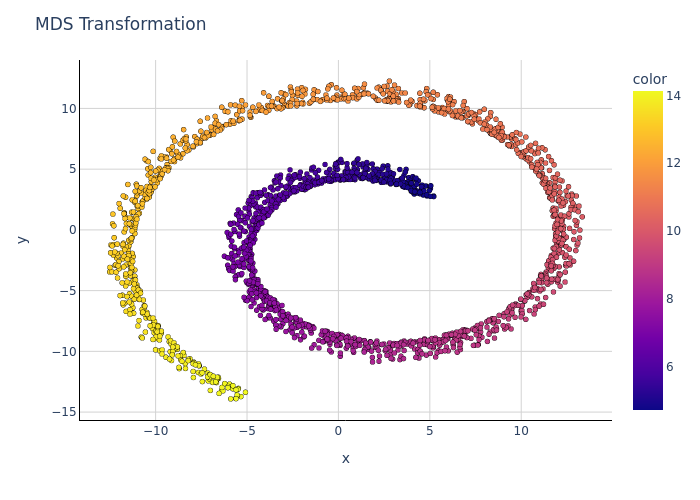

In [13]:

# Create a scatter plot
fig = px.scatter(None, x=X_trans[:,0], y=X_trans[:,1], opacity=1, color=y)

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title_text="MDS Transformation")

# Update marker size
fig.update_traces(marker=dict(size=5,
                             line=dict(color='black', width=0.2)))

fig.show('png')